In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('survey_results_public.csv')

In [2]:
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [3]:
# selecting columns that can contribute towards the salary prediction
df = df[["Country","EdLevel","YearsCodePro","Employment","ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly":"Salary"},axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Employed full-time,NaN
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Independent contractor, freelancer, or self-em...",NaN


In [4]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,17748.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46844 entries, 0 to 83438
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       46844 non-null  object 
 1   EdLevel       46823 non-null  object 
 2   YearsCodePro  46391 non-null  object 
 3   Employment    46831 non-null  object 
 4   Salary        46844 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.1+ MB


In [6]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [7]:
# Only will consider full time employed employees
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment",axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40211 entries, 9 to 83438
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       40211 non-null  object 
 1   EdLevel       40211 non-null  object 
 2   YearsCodePro  40211 non-null  object 
 3   Salary        40211 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [8]:
df['Country'].value_counts()

United States of America                                9175
India                                                   3385
Germany                                                 2753
United Kingdom of Great Britain and Northern Ireland    2604
Canada                                                  1553
                                                        ... 
Saint Kitts and Nevis                                      1
Monaco                                                     1
Libyan Arab Jamahiriya                                     1
Somalia                                                    1
Burundi                                                    1
Name: Country, Length: 166, dtype: int64

In [9]:
def shorten_categories(categories,cutoff):
    categories_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categories_map[categories.index[i]] = categories.index[i]
        else:
            categories_map[categories.index[i]] = 'Other'
            
    return categories_map

In [10]:
# removing countries with less than 400 contribution as we cannot consider them to be sufficient data
country_map = shorten_categories(df.Country.value_counts(),400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Other                                                   10725
United States of America                                 9175
India                                                    3385
Germany                                                  2753
United Kingdom of Great Britain and Northern Ireland     2604
Canada                                                   1553
France                                                   1396
Brazil                                                   1340
Spain                                                     890
Netherlands                                               835
Australia                                                 825
Poland                                                    775
Italy                                                     756
Russian Federation                                        741
Sweden                                                    735
Turkey                                                    458
Switzerl

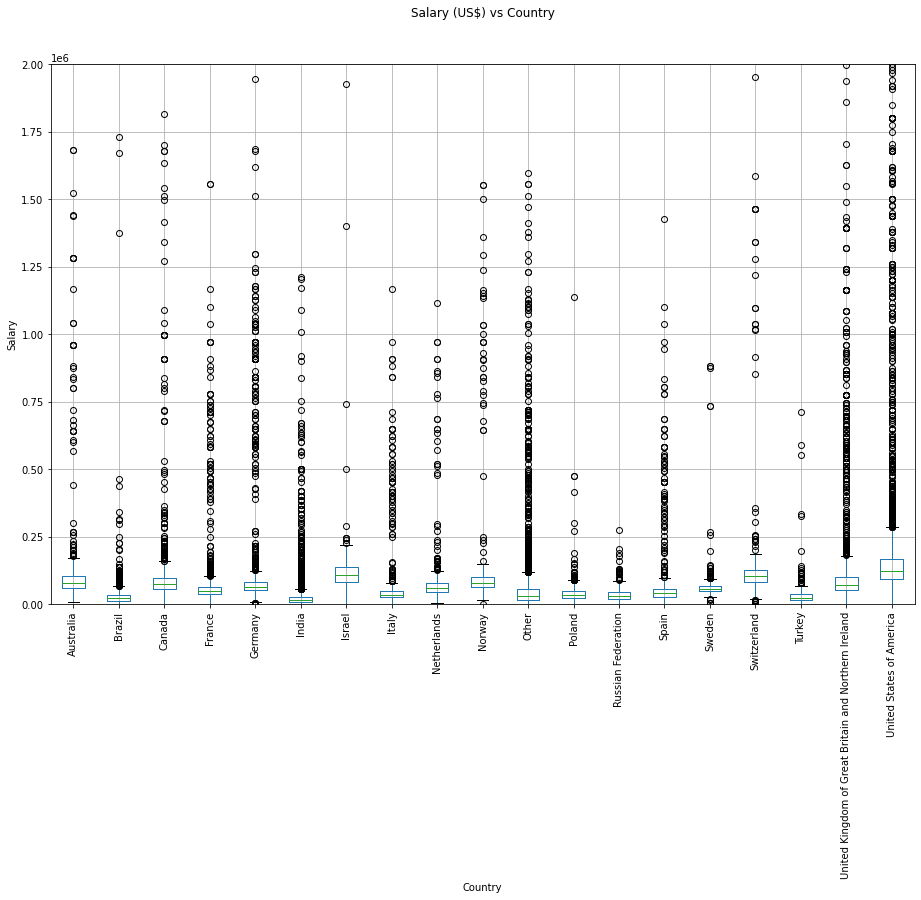

In [11]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
df.boxplot('Salary','Country', ax=ax)
plt.suptitle('Salary (US$) vs Country')
plt.title('')
plt.ylabel('Salary')
plt.ylim(0.0,2000000.0)
plt.xticks(rotation=90)
plt.show()

In [12]:
df = df[df['Salary'] <= 250000]
df = df[df['Salary']>=10000]
df = df[df['Country'] != 'Other']

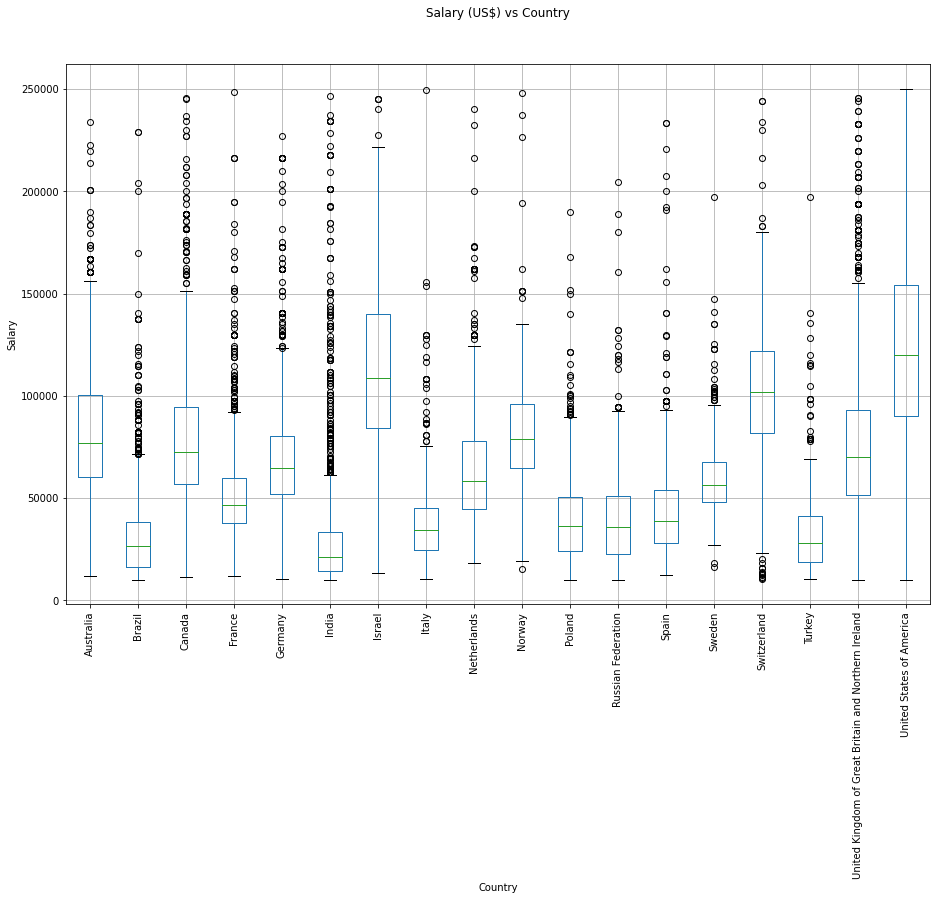

In [13]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
df.boxplot('Salary','Country', ax=ax)
plt.suptitle('Salary (US$) vs Country')
plt.title('')
plt.ylabel('Salary')
#plt.ylim(0.0,2000000.0)
plt.xticks(rotation=90)
plt.show()

In [14]:
df["YearsCodePro"].unique()

array(['4', '5', '6', '2', '18', '21', '16', '10', 'Less than 1 year',
       '3', '15', '12', '8', '17', '1', '14', '26', '34', '11', '25',
       '24', '22', '13', '9', '7', '39', '20', '27', '23', '30', '19',
       '35', '33', '37', '43', '40', '29', '38', '31', '42', '28', '46',
       '32', '36', '47', '45', '44', '41', 'More than 50 years', '50',
       '49', '48'], dtype=object)

In [15]:
# converting text to integer representation
def CleanCodePro(x):
    if x=='More than 50 years':
        return 50
    if x=='Less than 1 year':
        return 0.5
    return float(x)
df["YearsCodePro"] = df["YearsCodePro"].apply(CleanCodePro)

In [16]:
df["YearsCodePro"].unique()

array([ 4. ,  5. ,  6. ,  2. , 18. , 21. , 16. , 10. ,  0.5,  3. , 15. ,
       12. ,  8. , 17. ,  1. , 14. , 26. , 34. , 11. , 25. , 24. , 22. ,
       13. ,  9. ,  7. , 39. , 20. , 27. , 23. , 30. , 19. , 35. , 33. ,
       37. , 43. , 40. , 29. , 38. , 31. , 42. , 28. , 46. , 32. , 36. ,
       47. , 45. , 44. , 41. , 50. , 49. , 48. ])

In [17]:
df["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Other doctoral degree (Ph.D., Ed.D., etc.)', 'Something else',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],
      dtype=object)

In [18]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [19]:
df['EdLevel'].unique()

array(['Master’s degree', 'Bachelor’s degree', 'Post grad',
       'Less than a Bachelors'], dtype=object)

In [24]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([2, 0, 3, 1])

In [25]:
df['Country'].unique()

array(['Sweden', 'Spain', 'Germany', 'Turkey', 'Canada', 'France',
       'Switzerland',
       'United Kingdom of Great Britain and Northern Ireland',
       'Russian Federation', 'Israel', 'United States of America',
       'Brazil', 'Italy', 'Netherlands', 'Poland', 'Australia', 'India',
       'Norway'], dtype=object)

In [27]:
# Labelling Country name to digit.
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df['Country'].unique()

array([13, 12,  4, 15,  2,  3, 14, 16, 11,  6, 17,  1,  7,  8, 10,  0,  5,
        9])

In [28]:
# Creating our model of Salary vs Country,Education and other factors
x = df.drop("Salary",axis=1)
y = df['Salary']

In [29]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x,y.values)

LinearRegression()

In [30]:
y_pred = linear_reg.predict(x)

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y,y_pred))

In [33]:
print("${:,.02f}".format(error))

$41,838.10


In [35]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(x,y.values)

DecisionTreeRegressor(random_state=0)

In [36]:
y_pred = dec_tree_reg.predict(x)

In [39]:
error = np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$31,267.18


In [40]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(x,y.values)

RandomForestRegressor(random_state=0)

In [41]:
y_pred = random_forest_reg.predict(x)

In [43]:
error = np.sqrt(mean_squared_error(y,y_pred))
print("${:,.02f}".format(error))

$31,334.75


In [45]:
#using GridSearchCV to check for different depth the results obtained
from sklearn.model_selection import GridSearchCV

max_depth = [None,2,4,6,8,10,12]
parameters = {"max_depth":max_depth}

regressor = DecisionTreeRegressor(random_state=0)

gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(x,y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [46]:
regressor = gs.best_estimator_

regressor.fit(x,y.values)
y_pred = regressor.predict(x)

error = np.sqrt(mean_squared_error(y,y_pred))

print("${:,.02f}".format(error))

$32,049.21


In [47]:
# checking the x dataframe
x

,Country,EdLevel,YearsCodePro
9,13,2,4.0
11,12,0,5.0
12,4,2,6.0
16,15,0,2.0
17,2,0,6.0
...,...,...,...
83430,17,2,21.0
83432,2,0,0.5
83434,17,0,5.0
83436,17,1,4.0


In [53]:
# adding a new array
x = np.array([["United States of America",'Master’s degree',15]])
x

array([['United States of America', 'Master’s degree', '15']],
      dtype='<U24')

In [54]:
# label encoding the country and degree

#encoding first column of country
x[:,0] = le_country.transform(x[:,0])

#encoding second column of degree
x[:,1] = le_education.transform(x[:,1])

#setting as float value
x = x.astype(float)
x

array([[17.,  2., 15.]])

In [55]:
y_pred = regressor.predict(x)
y_pred

C:\Users\ADRIAN\OneDrive\Documents\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([148942.20512821])

## Let's package our given model

In [56]:
import pickle

In [57]:
data = {"model":regressor, "le_country":le_country, "le_education":le_education}

#saving our data in binary file
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [60]:
#checking if our file was saved correctly

with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)
    
regressor_loaded = data["model"]
le_country = data["le_country"]
le_eduaction = data["le_education"]


In [61]:
y = regressor_loaded.predict(x)
y_pred

C:\Users\ADRIAN\OneDrive\Documents\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([148942.20512821])